In [3]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data_genetator = CmdStanModel(stan_file = 'generate_data.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [5]:
I= 5 #number of letters in name
N= 7 #number of letters in surname
DoB= 2000.2310 #date of birth
seed=int(DoB*1e4+100*I+N)
print(seed)
generated_data = data_genetator.sample(chains=1, iter_sampling=1, iter_warmup=0, fixed_param=True,seed=seed)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed

20002817
                                                                                


INFO:cmdstanpy:CmdStan done processing.


 ### Coefficients of linear model 

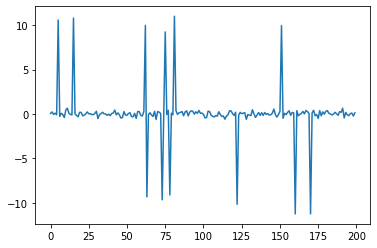

In [6]:
beta_s = generated_data.stan_variable('beta')
plt.plot(generated_data.stan_variable('beta')[0])

### Model 1 - Unifom prior for beta

In [7]:
model_uniform = CmdStanModel(stan_file = 'model1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [8]:
data_for_inference = {'N':100,
                      'M':200,
                      'x':generated_data.stan_variable('x')[0],
                      'y':generated_data.stan_variable('y')[0]
                      }

In [10]:
fit_unf = model_uniform.sample(data=data_for_inference,seed=seed)

INFO:cmdstanpy:CmdStan start processing





















































































































































































































































































































































































































chain 1 |██████████| 06:32 Sampling completed                       
chain 2 |██████████| 06:32 Sampling completed                       
chain 3 |██████████| 06:32 Sampling completed                       
chain 4 |██████████| 06:32 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [11]:
print(fit_unf.diagnose())

Processing csv files: C:\Users\TOSHIBA\AppData\Local\Temp\tmppe4x4d7r\model1-20220403015129_1.csv, C:\Users\TOSHIBA\AppData\Local\Temp\tmppe4x4d7r\model1-20220403015129_2.csv, C:\Users\TOSHIBA\AppData\Local\Temp\tmppe4x4d7r\model1-20220403015129_3.csv, C:\Users\TOSHIBA\AppData\Local\Temp\tmppe4x4d7r\model1-20220403015129_4.csv

Checking sampler transitions treedepth.
3998 of 4000 (99.95%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
2 of 4000 (0.05%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-BFMI, 

## Task 1
1. Analyse the diagnosis of model. What sampling issues occured?
2. For each fitted beta coefficient plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with true values of beta.
3. Substract true values from fitted betas and make the same plot (residues)

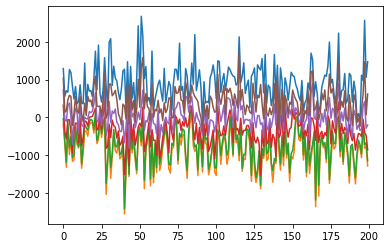

In [34]:
def plots(b):
    max = []
    min = []

    quantiles = {}
    quantiles['q1'] = []
    quantiles['q2'] = []
    quantiles['q3'] = []
    quantiles['q4'] = []
    quantiles['q5'] = []
    for i in range(b.shape[1]):
        b_c = b[:,i] 
        max.append(np.max(b_c))
        min.append(np.min(b_c))

    
        quantiles['q1'].append(np.quantile(b_c, 0.05))
        quantiles['q2'].append(np.quantile(b_c, 0.25))
        quantiles['q3'].append(np.quantile(b_c, 0.5))
        quantiles['q4'].append(np.quantile(b_c, 0.75))
        quantiles['q5'].append(np.quantile(b_c, 0.95))

    plt.plot(max)
    plt.plot(min)


    for i in range(1,len(quantiles.keys())):
        plt.plot(quantiles['q'+str(i)])

    plt.show()

beta = fit_unf.stan_variable('beta')
plots(beta)

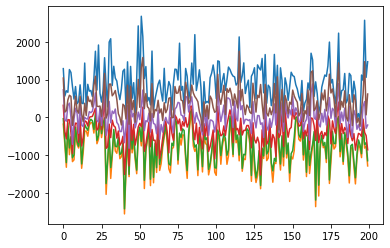

In [35]:

residuals = beta - data_for_inference['x'][:,0]


plots(residuals)


## Model 2

In [14]:
model_reg = CmdStanModel(stan_file = 'model2.stan')

INFO:cmdstanpy:compiling stan file C:\Users\TOSHIBA\Desktop\CPS\Semester 1\Data analysis\Lab4\model2.stan to exe file C:\Users\TOSHIBA\Desktop\CPS\Semester 1\Data analysis\Lab4\model2.exe
INFO:cmdstanpy:compiled model executable: C:\Users\TOSHIBA\Desktop\CPS\Semester 1\Data analysis\Lab4\model2.exe


In [15]:
fit_reg = model_reg.sample(data=data_for_inference,seed=seed)

INFO:cmdstanpy:CmdStan start processing












































































































































































































































































































































































































chain 1 |██████████| 00:12 Sampling completed                       
chain 2 |██████████| 00:12 Sampling completed                       
chain 3 |██████████| 00:12 Sampling completed                       
chain 4 |██████████| 00:12 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [16]:
print(fit_reg.diagnose())

Processing csv files: C:\Users\TOSHIBA\AppData\Local\Temp\tmppe4x4d7r\model2-20220403015950_1.csv, C:\Users\TOSHIBA\AppData\Local\Temp\tmppe4x4d7r\model2-20220403015950_2.csv, C:\Users\TOSHIBA\AppData\Local\Temp\tmppe4x4d7r\model2-20220403015950_3.csv, C:\Users\TOSHIBA\AppData\Local\Temp\tmppe4x4d7r\model2-20220403015950_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



### Task 2
1. Analyse the diagnosis of model. Are the sampling problems solved
2. For each fitted beta coefficient plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with true values of beta.
3. Substract true values from fitted betas and make the same plot (residues)

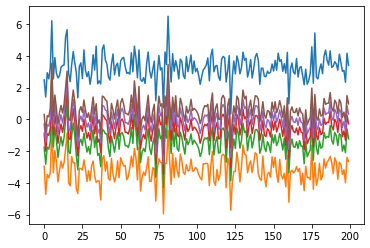

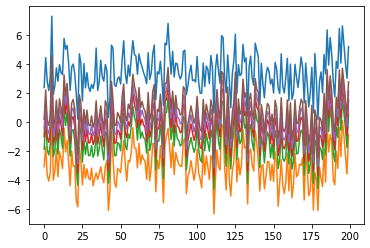

In [37]:
beta = fit_reg.stan_variable('beta')
residuals = beta - data_for_inference['x'][:,0]
plots(beta)
plots(residuals)

### Model 3

In [21]:
model_lap = CmdStanModel(stan_file = 'model3.stan')

INFO:cmdstanpy:compiling stan file C:\Users\TOSHIBA\Desktop\CPS\Semester 1\Data analysis\Lab4\model3.stan to exe file C:\Users\TOSHIBA\Desktop\CPS\Semester 1\Data analysis\Lab4\model3.exe
INFO:cmdstanpy:compiled model executable: C:\Users\TOSHIBA\Desktop\CPS\Semester 1\Data analysis\Lab4\model3.exe


In [23]:
fit_lap = model_lap.sample(data=data_for_inference,seed=seed,adapt_delta=0.99,max_treedepth=12) #sampling problematic some parameters have to be adjusted

INFO:cmdstanpy:CmdStan start processing










































































































































































































































































































































































































































































































































































































































































































































































































chain 1 |██████████| 09:06 Sampling completed                       
chain 2 |██████████| 09:06 Sampling completed                       
chain 3 |██████████| 09:06 Sampling complete


INFO:cmdstanpy:CmdStan done processing.


### Task 3
1. Analyse the diagnosis of model. Are the sampling problems solved. Are there any new sampling issues?
2. For each fitted beta coefficient plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with true values of beta.
3. Substract true values from fitted betas and make the same plot (residues)


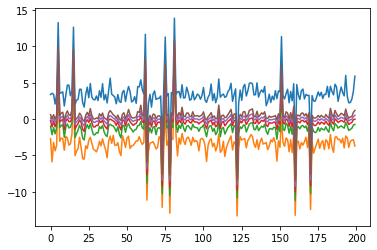

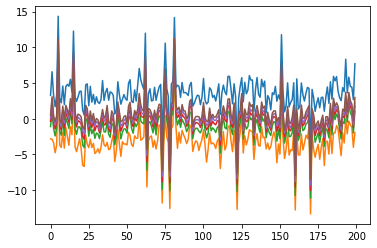

In [38]:
beta = fit_lap.stan_variable('beta')
residuals = beta - data_for_inference['x'][:,0]

plots(beta)
plots(residuals)
